VGGFace sketch to face models code

In [1]:
from keras.models import model_from_json

from keras.layers import Conv2D, UpSampling2D, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Dropout, Flatten, Activation
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os
# Weights: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
# https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))
model.load_weights('vgg_face_weights.h5')

2023-03-09 17:28:12.612992: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 17:28:15.905359: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


VGGFace encoder

In [2]:
vgg_face_descriptor = Model(inputs=model.layers[0].input
, outputs=model.layers[-8].output)

In [9]:
vgg_face_descriptor.save("vggFace_encoder.model")

INFO:tensorflow:Assets written to: vggFace_encoder.model/assets


INFO:tensorflow:Assets written to: vggFace_encoder.model/assets


In [ ]:
vgg_face_descriptor.summary()

Preprocessing

In [3]:
import cv2
from tqdm import tqdm 
import re
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 224

image_path = 'CUHK Dataset/CUHK_training_cropped_photos'
img_array = []

sketch_path = 'CUHK Dataset/CUHK_training_cropped_sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

image_test_path = 'CUHK Dataset/CUHK_testing_cropped_photos'
image_test_file = sorted_alphanumeric(os.listdir(image_test_path))
img_test_array = []

for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(img_to_array(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(img_to_array(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))
    
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

train_sketch = sketch_array
train_image = img_array

for i in tqdm(image_test_file):
    image = cv2.imread(image_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_test_array.append(img_to_array(image))
    # Image Augmentation

test_image = img_test_array

sketch_test_path = 'CUHK Dataset/CUHK_testing_cropped_sketches'
sketch_test_file = sorted_alphanumeric(os.listdir(sketch_test_path))
sketch_test_array = []

for i in tqdm(sketch_test_file):
    image = cv2.imread(sketch_test_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    sketch_test_array.append(img_to_array(image))
    # Image Augmentation

test_sketch = sketch_test_array

100%|██████████| 88/88 [00:00<00:00, 433.50it/s]


Total number of sketch images: 704
Total number of images: 704


100%|██████████| 100/100 [00:00<00:00, 1191.02it/s]


Create feature vector

In [ ]:
Y = np.array(img_array)

vggfeatures = []
for i in range(len(sketch_array)):
  sample = sketch_array[i]
  sample = sample.reshape((1,224,224,3))
  prediction = vgg_face_descriptor.predict(sample)
  prediction = prediction.reshape((7,7,512))
  vggfeatures.append(prediction)
vggfeatures = np.array(vggfeatures)
print(vggfeatures.shape)

In [5]:
def show_final_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('Loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('Accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].set_xlabel("Epochs")
    ax[1].set_xlabel("Epochs")
    ax[0].legend()
    ax[1].legend()

#https://medium.com/intelligentmachines/convolutional-neural-network-and-regularization-techniques-with-tensorflow-and-keras-5a09e6e65dc7

In [5]:
############################################
def show_images(real,sketch, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Image",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

In [ ]:
#Decoder with dropout
model = Sequential()

model.add(Conv2D(512, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Dropout(0.1))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.1))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
#changed to 3
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss='mse' , metrics=['accuracy'])
history_d = model.fit(vggfeatures, Y, verbose=1, epochs=1000, validation_split=0.1, batch_size=124)



show_final_history(history_d)

In [ ]:
model.save('vggface_s2f_dropout_1000.model')

Test images:
1/1 [==============================] - 0s 97ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 27ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 30ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Train images:
1/1 [==============================] - 0s 32ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 29ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 28ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1/1 [==============================] - 0s 31ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


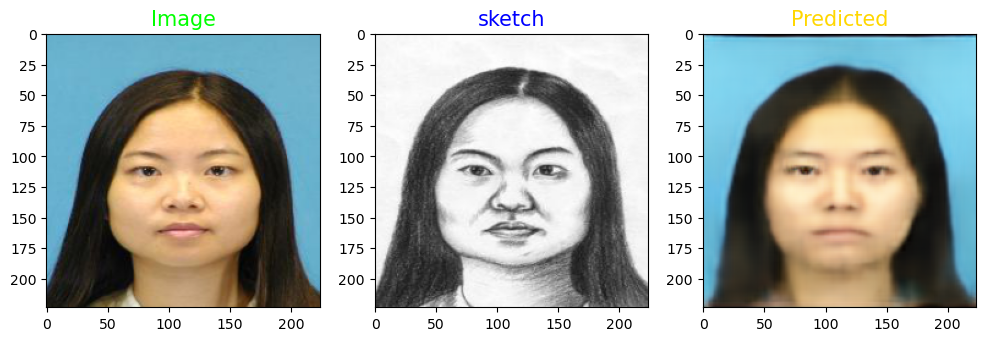

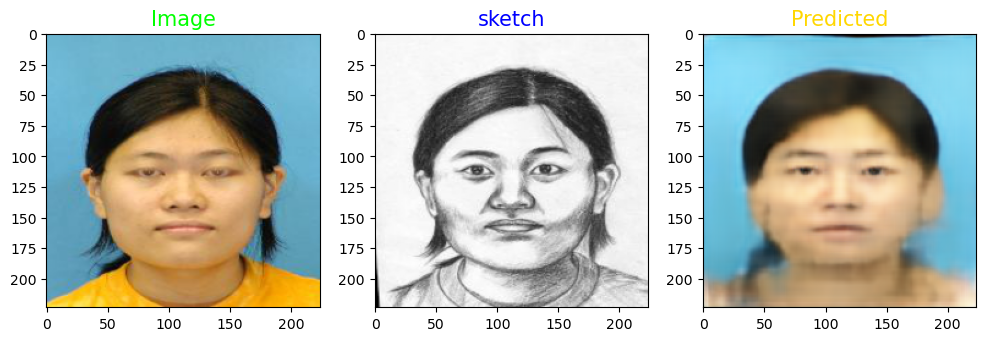

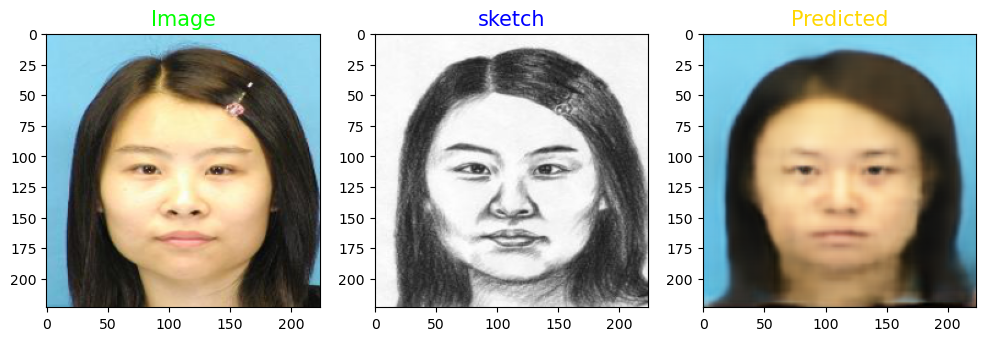

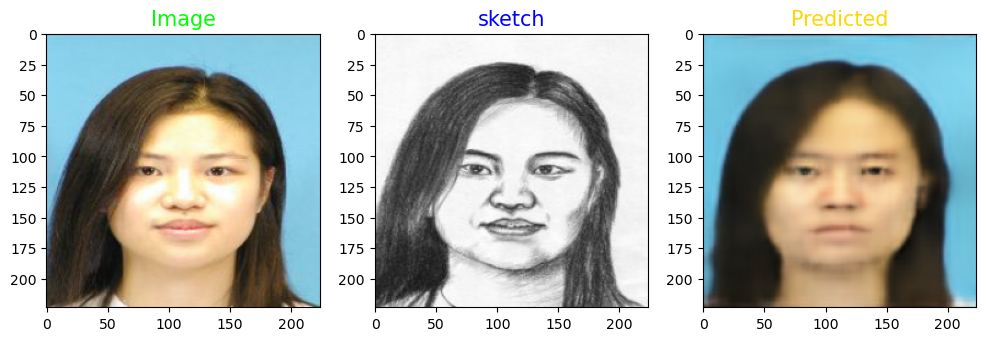

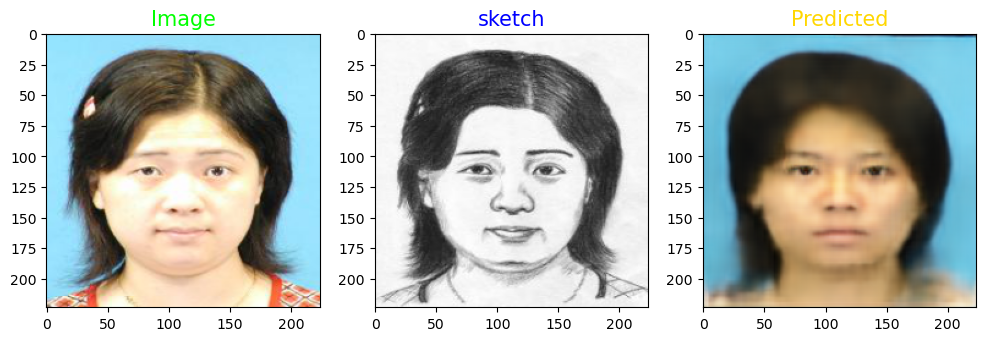

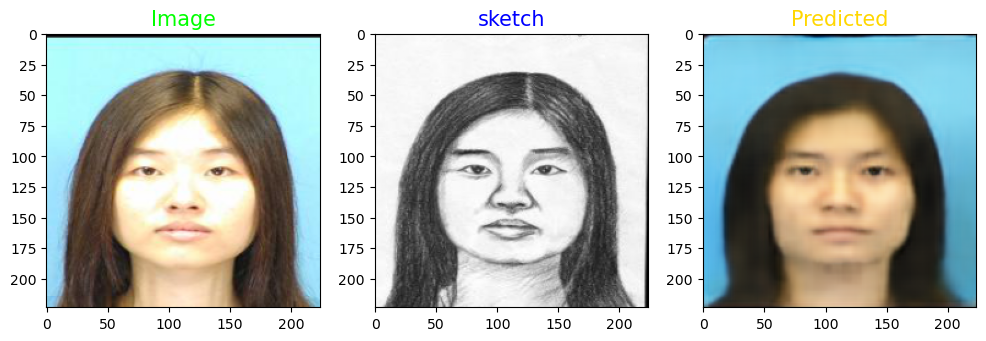

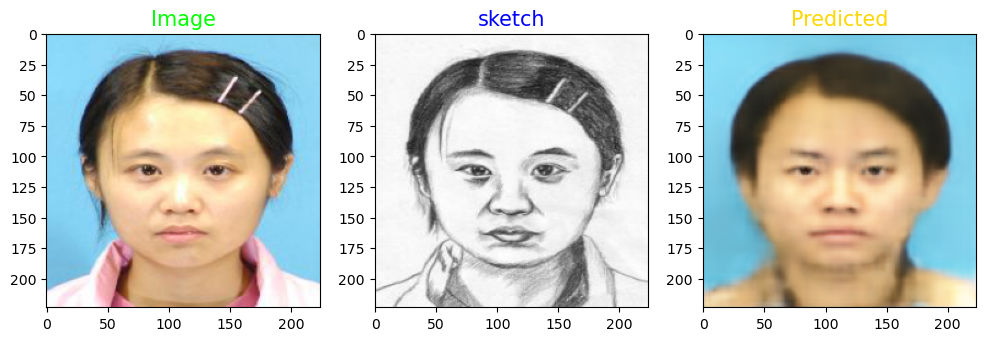

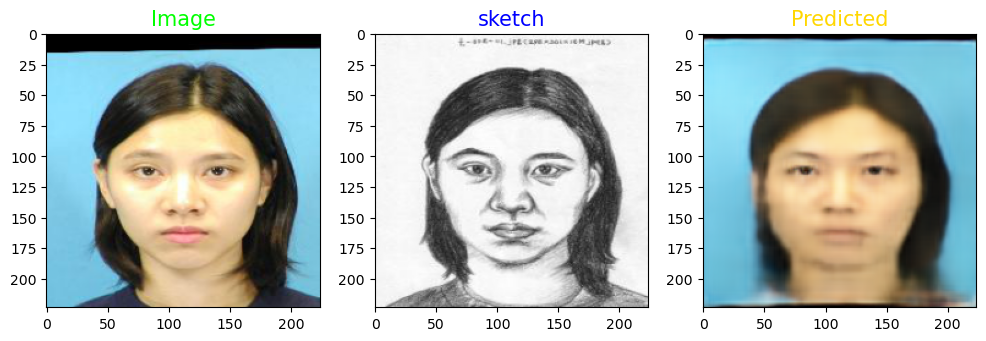

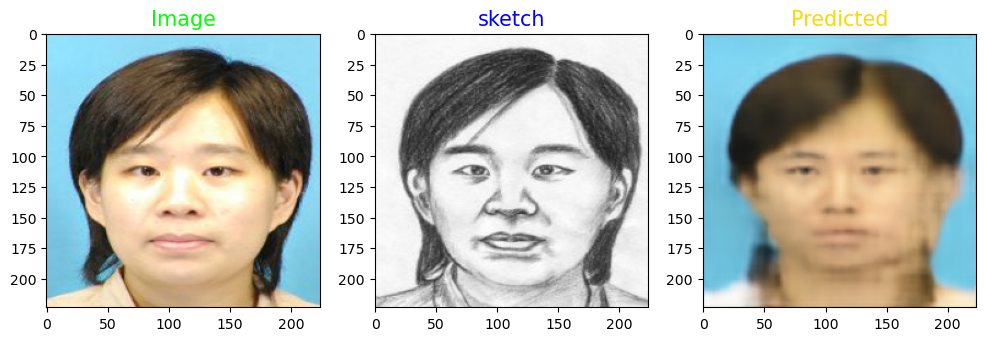

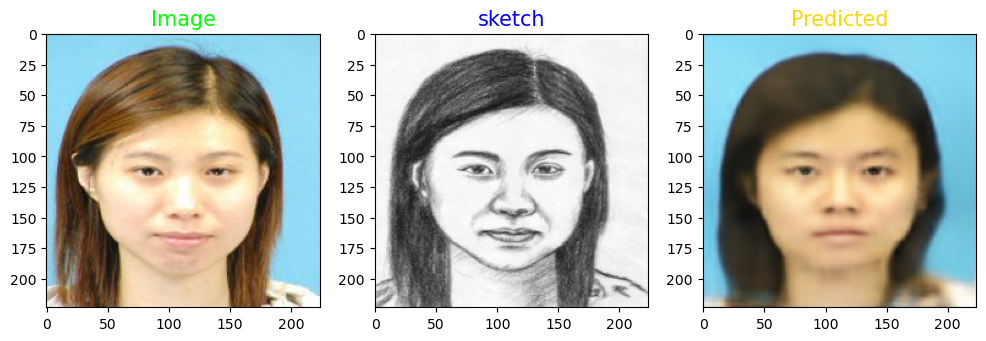

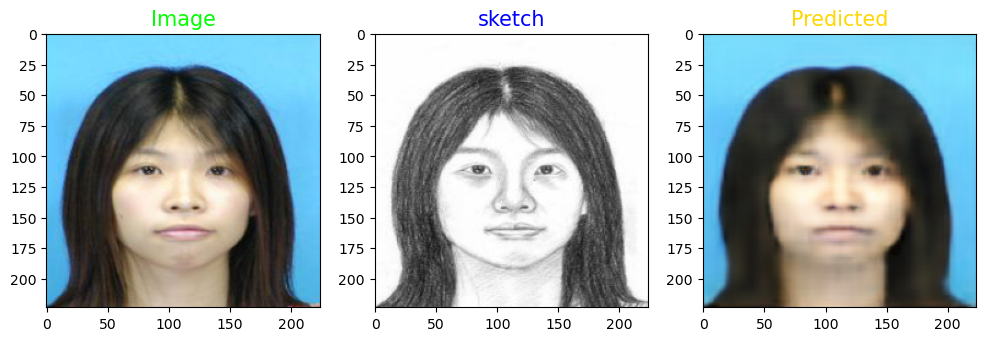

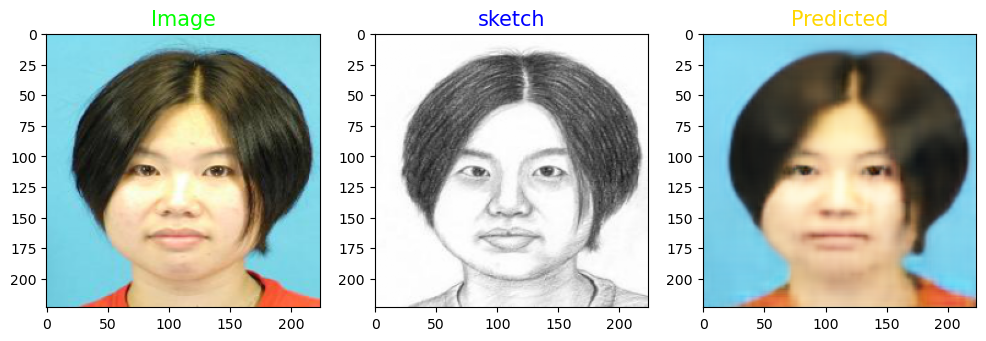

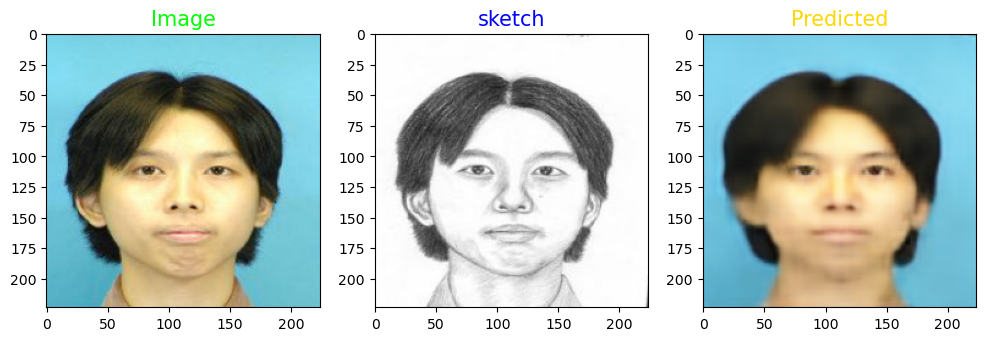

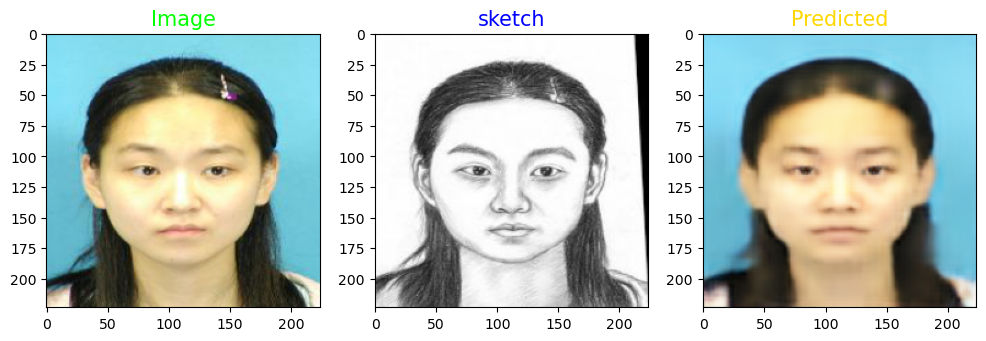

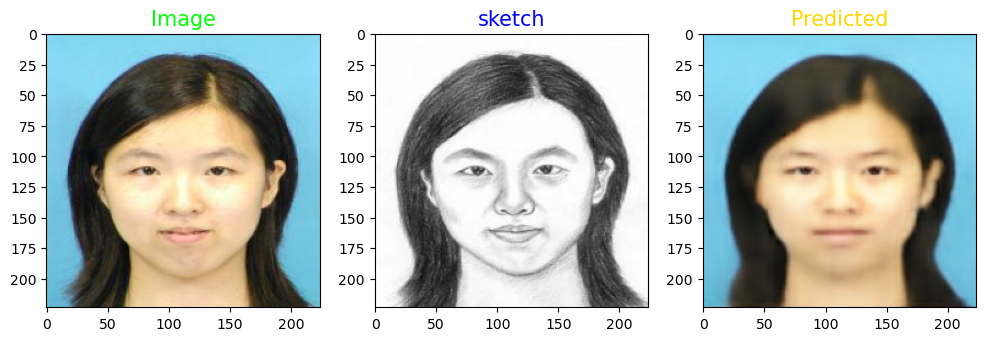

In [6]:
model = tf.keras.models.load_model('vggface_s2f_dropout_1000.model',
                                   custom_objects=None,
                                   compile=True)
print("Test images:")
for i in range(10):
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = vgg_face_descriptor.predict(test_sketch_sample)
    sample_pred = model.predict(vggpred).reshape((224,224,3))
    
    show_images(test_image[i],test_sketch[i],sample_pred)
print("Train images:")
for i in range(0,40,8):
    test_sketch_sample = train_sketch[i].reshape((1,224,224,3))
    vggpred = vgg_face_descriptor.predict(test_sketch_sample)
    sample_pred = model.predict(vggpred).reshape((224,224,3))
    
    show_images(train_image[i],train_sketch[i],sample_pred)

Normal model

In [ ]:
#Decoder
model = Sequential()

model.add(Conv2D(512, (3,3), activation='relu', padding='same', input_shape=(7,7,512)))
model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
#changed to 3
model.add(Conv2D(3, (3, 3), activation='tanh', padding='same'))

model.summary()

In [ ]:
model.compile(optimizer = 'adam', loss='mse' , metrics=['accuracy'])
history = model.fit(vggfeatures, Y, verbose=1, epochs=1000, validation_split=0.1, batch_size=124)



show_final_history(history)

In [ ]:
model.save('vggface_s2f_1000.model')

In [ ]:





print("Test images:")
for i in range(100):
    test_sketch_sample = test_sketch[i].reshape((1,224,224,3))
    vggpred = vgg_face_descriptor.predict(test_sketch_sample)
    sample_pred = model.predict(vggpred).reshape((224,224,3))
    
    show_images(test_image[i],test_sketch[i],sample_pred)
print("Train images:")
for i in range(0,40,8):
    test_sketch_sample = train_sketch[i].reshape((1,224,224,3))
    vggpred = vgg_face_descriptor.predict(test_sketch_sample)
    sample_pred = model.predict(vggpred).reshape((224,224,3))
    
    show_images(train_image[i],train_sketch[i],sample_pred)